<img src='https://raw.githubusercontent.com/levc17/ML-tarea3-regression/main/landscape_banner2.png'>

#Métricas para regresión y clasificación

Regresión y clasificación son los dos principales grupos en los que se pueden dividir los procedimientos de aprendizaje automático supervisado.

En las tareas de clasificación, se predicen targets de origen categórico. Interesa la predicción de la clase (o clases).

En las tareas de regresión, se predicen targets que corresponden a variables numéricas. Interesa la predicción del valor.

A continuación se describirán y analizará la operación de varias métricas usadas para evaluar problemas de regresión y clasificación (binaria, multiclase y multilabel). Se entrenarán modelos de *Random Forest*, o Bosques aleatorios, con diferentes conjuntos de datos para calcular las distintas métricas asociadas a cada problema.

La lista de métricas y sus respectivas ecuaciones están basadas principalmente en la bliblioteca [*scikit-learn*](https://https://scikit-learn.org/stable/modules/model_evaluation.html#):

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

#Regresión

Para la parte de regresión, se seleccionó el conjunto de datos '[Miami Housing Dataset](https://www.kaggle.com/deepcontractor/miami-housing-dataset?select=miami-housing.csv)' de Kaggle (CC0).

El mismo contiene información de 13,932 propiedades familiares vendidas en Miami durante 2016. Cuenta con 17 columnas, incluyendo el precio de venta 'SALE_PRC', la cual será el target de este procedimiento.

Las columnas del conjunto de datos y su respectivo contenido son:

LATITUDE: latitud

LONGITUDE: longitud

PARCELNO: identificador único para cada propiedad

SALE_PRC: precio de venta (USD)

LND_SQFOOT: área del terreno (pies cuadrados)

TOTLVGAREA: área construida (pies cuadrados)

SPECFEATVAL: valor de amenidades (p. ej., piscinas) (USD)

RAIL_DIST: distancia a la línea férrea más cercana (un indicador de ruido) (pies)

OCEAN_DIST: distancia al océano (pies)

WATER_DIST: distancia al cuerpo de agua más cercano (pies)

CNTR_DIST: distancia al distrito comercial central de Miami (pies)

SUBCNTR_DI: distancia al centro secundario más cercano (pies)

HWY_DIST: distancia a la autopista más cercana (un indicador de ruido) (pies)

age: edad de la estructura

avno60plus: variable 'dummy' para cuando el ruido de aeroplanos excede un nivel aceptable

month_sold: mes de venta en 2016 (1 = ene)

structure_quality: calidad de la estructura

In [72]:
##############################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
##############################################

In [73]:
#Se carga el conjunto de datos
miami = pd.read_csv("https://raw.githubusercontent.com/levc17/ML-tarea3-regression/main/miami-housing.csv")

In [74]:
#Se revisa que el archivo se cargó correctamente y se visualiza un resumen descriptivo
miami.describe().T

,count,mean,std,min,25%,50%,75%,max
LATITUDE,13932.0,2.572881e+01,1.406333e-01,2.543433e+01,2.562006e+01,2.573181e+01,2.585227e+01,2.597438e+01
LONGITUDE,13932.0,-8.032748e+01,8.919907e-02,-8.054217e+01,-8.040328e+01,-8.033891e+01,-8.025802e+01,-8.011975e+01
PARCELNO,13932.0,2.356496e+12,1.199290e+12,1.020008e+11,1.079160e+12,3.040300e+12,3.060170e+12,3.660170e+12
SALE_PRC,13932.0,3.999419e+05,3.172147e+05,7.200000e+04,2.350000e+05,3.100000e+05,4.280000e+05,2.650000e+06
LND_SQFOOT,13932.0,8.620880e+03,6.070089e+03,1.248000e+03,5.400000e+03,7.500000e+03,9.126250e+03,5.706400e+04
TOT_LVG_AREA,13932.0,2.058045e+03,8.135385e+02,8.540000e+02,1.470000e+03,1.877500e+03,2.471000e+03,6.287000e+03
SPEC_FEAT_VAL,13932.0,9.562493e+03,1.389097e+04,0.000000e+00,8.100000e+02,2.765500e+03,1.235225e+04,1.750200e+05
RAIL_DIST,13932.0,8.348549e+03,6.178027e+03,1.050000e+01,3.299450e+03,7.106300e+03,1.210260e+04,2.962150e+04
OCEAN_DIST,13932.0,3.169099e+04,1.759508e+04,2.361000e+02,1.807935e+04,2.854175e+04,4.431065e+04,7.574490e+04
WATER_DIST,13932.0,1.196029e+04,1.193299e+04,0.000000e+00,2.675850e+03,6.922600e+03,1.920000e+04,5.039980e+04


In [75]:
#Se revisa si hay datos faltantes
miami[miami.isna().any(axis=1)]

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality


In [76]:
miami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [77]:
miami.shape

(13932, 17)

In [78]:
# Todas las columnas tienen datos númericos.
# Se remueven 1 columna: 'PARCELNO', porque corresponde a un identificador de cada propiedad.
# Y se elimina el target 'SALE_PRC' para crear la matriz de features X.
X = miami.drop(columns=['PARCELNO', 'SALE_PRC'])
print(X.shape)

#Se crea el target
y = miami['SALE_PRC']
print(y.shape)

(13932, 15)
(13932,)


**Reducción de dimensionalidad**

Dado que la matriz de features cuenta con 15 variables y el enfoque general de este procedimiento se basa en las métricas de los modelos de aprendizaje automático, se optó por reducir el conjunto de datos a solo 8 variables para facilitar las rondas de ejecución.

Para esto, se utilizó la función *SelectKBest* de scikit-learn, y la función *f_regression* para elegir las mejores variables con base en pruebas estadísticas univariadas (F scores).

In [79]:
#Selección de las mejores 8 variables con las librerías de scikit-learn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array

seleccion = SelectKBest(f_regression, k=8)
X8 = seleccion.fit_transform(X, y)
print(X8.shape)

filtro = seleccion.get_support()
features = array(X.columns)

X=pd.DataFrame(X8)
X.columns=features[filtro]
X.head()

(13932, 8)


,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,OCEAN_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,structure_quality
0,9375.0,1753.0,0.0,12811.4,42815.3,37742.2,15954.9,4.0
1,9375.0,1715.0,0.0,10648.4,43504.9,37340.5,18125.0,4.0
2,9375.0,2276.0,49206.0,10574.1,43530.4,37328.7,18200.5,4.0
3,12450.0,2058.0,10033.0,10156.5,43797.5,37423.2,18514.4,4.0
4,12800.0,1684.0,16681.0,10836.8,43599.7,37550.8,17903.4,4.0


A continuación, se divide el conjunto de datos en el training set y el test set, en proporciones 0.8 y 0.2, respectivamente.

Luego se entrena un modelo de Random Forest, usando la función *RandomForestRegressor*, para predecir el precio de las propiedades a partir de los 8 features seleccionados anteriormente.

Random Forest es un algoritmo que no se ve afectado por la escala de las variables. Por lo tanto, no se realizó normalización ni estandarización, procedimientos que serían necesarios de aplicarse otros métodos de regresión.

In [80]:
#Se divide el conjunto de datos en training set y test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [81]:
#Se entrena un modelo de Random Forest para regresión
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_predict=RF.predict(X_test)

El siguiente gráfico de dispersión muestra la relación entre los valores observados y las predicciones del modelo. Se observa que a mayores valores del target aumenta el error en las predicciones.

Existen una serie de métricas que sirven para calcular qué tan bueno es el ajuste de los modelos de regresión, las cuales se describirán a a continuación.

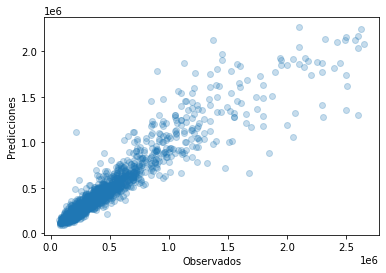

In [82]:
#Gráfico de dispersión de predicciones contra valores observados
plt.scatter(y_test, y_predict, alpha = 0.25)
plt.xlabel('Observados')
plt.ylabel('Predicciones')
plt.show()

In [83]:
#Se importan las distintas métricas de regresión
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_pinball_loss
from sklearn.metrics import d2_tweedie_score
#from sklearn.metrics import d2_pinball_score
#from sklearn.metrics import d2_absolute_error_score

###R$^2$ score

El coeficiente de determinación, $R^2$, corresponde a la proporción de la varianza en la variable dependiente (target) que es predecible por las variables dependientes (features).

Tiene un mejor valor posible igual a 1, cuando la predicción es perfecta.

Puede ser negativo y no necesariamente es equivalente al cuadrado del valor $R$.

Cuando los residuos de la predicción tienen promedio de cero, el **$R^2$** es idéntico al **Explained variance score**.

$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [84]:
RF_r2_score = r2_score(y_test, y_predict)
print('R^2:', RF_r2_score)

R^2: 0.8869845909923163


###Mean absolute error

Esta métrica corresponde al valor esperado de la función de pérdida de la norma $l1$, o pérdida del error absoluto.

Dada una cantidad de muestras, se calcula de la siguiente manera:

$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$

In [85]:
RF_mean_absolute_error = mean_absolute_error(y_test, y_predict)
print('MAE:', RF_mean_absolute_error)

MAE: 54324.7278196388


###Mean squared error

Una métrica que consiste en el valor esperado del error cuadrado. Puede entenderse como una medida de la calidad del estimador. Se deriva del cuadrado de la distancia Euclidiana.

El MSE siempre es positivo y disminuye conforme el error se acerca a 0.

$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$







In [86]:
RF_mean_squared_error = mean_squared_error(y_test, y_predict)
print('MSE:', RF_mean_squared_error)

MSE: 12836682299.483072


###Mean squared log error

MSLE calcula el valor esperado de la función de pérdida del error logarítmico cuadrado. Esta métrica es útil cuando los target muestran un comportamiento exponencial, como el crecimiento de algunas poblaciones. Puede tender a más a sobrestimaciones que a subestimaciones.

$\text{MSLE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2$

In [87]:
RF_mean_squared_log_error = mean_squared_log_error(y_test, y_predict)
print('MSLE:', RF_mean_squared_log_error)

MSLE: 0.03093873327045784


###Mean absolute percentage error

MAPE es una métrica que es sensitiva principalmente a errores relativos. Por consiguiente, no se ve afectada por cambios en  la escala del target.

Malas predicciones pueden inflar arbitrariamente los valores de MAPE, especialmente cuando valores observados del target son cercanos a cero.

El mejor valor es 0.

$\text{MAPE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \frac{{}\left| y_i - \hat{y}_i \right|}{\max(\epsilon, \left| y_i \right|)}$

In [88]:
RF_mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_predict)
print('MAPE:', RF_mean_absolute_percentage_error)

MAPE: 0.1296457445360175


###Median absolute error

Esta métrica tiene la ventaja de que es robusta ante valores extremos. La pérdida se estima calculando la mediana de todas las diferencias absolutas entre el target y las predicciones.

El mejor valor es 0.0.


$\text{MedAE}(y, \hat{y}) = \text{median}(\mid y_1 - \hat{y}_1 \mid, \ldots, \mid y_n - \hat{y}_n \mid)$



In [89]:
RF_median_absolute_error = median_absolute_error(y_test, y_predict)
print('MedAE:', RF_median_absolute_error)

MedAE: 26278.0


###Max error

El *Max Error* o error máximo calcula el máximo error en los residuos, es decir, la mayor diferencia entre una predicción y su correspondiente valor observado. Muestra el grado de error que el modelo tuvo cuando se ajustó.

Su mejor valor es 0. 

$\text{Max Error}(y, \hat{y}) = \max(| y_i - \hat{y}_i |)$

In [90]:
RF_max_error = max_error(y_test, y_predict)
print('MaxError:', RF_max_error)

MaxError: 1304615.0


###Explained variance score

Métrica que mide la proporción en la que el modelo explica la varianza del conjunto de datos. Es complementaria a la varianza residual.

Es similar a $R^2$, pero esta última métrica generalmente es preferible porque toma en cuenta desvíos sistemáticos en las predicciones.

Su mejor valor posible es 1.0, y menores valores indican una menor proporción.

$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$

In [91]:
RF_explained_variance_score = explained_variance_score(y_test, y_predict)
print('explained variance:', RF_explained_variance_score)

explained variance: 0.8870056826305452


###Otras métricas para evaluar modelos de regresión

In [92]:
#Métricas adicionales

power_values = [0, 1, 2]
txt = "mean Tweedie deviance error with power={}:"
for i in power_values:
  D = mean_tweedie_deviance(y_test, y_predict, power = i)
  print(txt.format(i), D)

RF_mean_pinball_loss = mean_pinball_loss(y_test, y_predict)
print('pinball:', RF_mean_pinball_loss)
RF_d2_tweedie_score = d2_tweedie_score(y_test, y_predict)
print('D^2:', RF_d2_tweedie_score)

mean Tweedie deviance error with power=0: 12836682299.483072
mean Tweedie deviance error with power=1: 14615.843678552756
mean Tweedie deviance error with power=2: 0.02963489720189383
pinball: 27162.3639098194
D^2: 0.8869845909923163


Se observa que en algunos casos, según las especificaciones que se utilicen, algunas métricas son equivalentes entre ellas. Por ejemplo, el *mean Tweedie deviance error* con power=0, es igual al MSE. Algunas métricas por lo tanto, pueden ser redundantes.

In [93]:
RF_mean_squared_error = mean_squared_error(y_test, y_predict)
print('MSE:', RF_mean_squared_error)

MSE: 12836682299.483072


###Comparación de métricas de regresión

**Variación de métricas de regresión según tamaño de muestras en modelos de RF**

Para explorar el comportamiento de las distintas métricas, se calcularon varios modelos de *Random Forest* (RF) con variaciones en el hiperparámetro 'max_samples' o tamaño de las muestras. El mismo controla la cantidad de instancias o registros que que se usan a la vez para construir cada uno de los árboles de decisión del bosque aleatorio. Al ser un método de ensamble, posteriormente promedia todas las predicciones, mejorando el desempeño del modelo y ayudando a no caer en sobreajuste.

Conforme el tamaño de las muestras aumenta, existe mayor representatividad de los datos en cada árbol y por lo tanto hay un mejor ajuste del modelo de RF.

A continuación se calculan las variaciones de los modelos de RF según 11 valores de 'max_samples' entre 1000 y 2000, y se analizan el patrón general de las métricas. Posteriormente, se describe brevemente cada métrica.

In [94]:
#Se generan múltiples modelos de regresión con RF
# y se recolecta información de las métricas respectivas

test_metric = []

regression_metrics = [r2_score, mean_absolute_error,
                      mean_squared_error, mean_squared_log_error,
                      mean_absolute_percentage_error, median_absolute_error,
                      max_error, explained_variance_score]

valores_de_muestras = range(1000, 2001, 100)
for num in valores_de_muestras:
  #contruir modelos de Random Forest según diferentes tamaños de muestra 
  RF = RandomForestRegressor(max_samples = num, n_estimators = 100, random_state = 18)
  RF.fit(X_train, y_train)
  y_predict=RF.predict(X_test)

  for metric in regression_metrics:
    #calcular y almacenar valores de las métricas
    metric_value = metric(y_test, y_predict)
    test_metric.append(metric_value)

In [95]:
#Se genera un dataframe con los valores de los modelos RF para cada métrica
test_metrics_np = np.asarray(test_metric).reshape(11, 8)
metric_names = []
for t in regression_metrics:
  metric_names.append(t.__name__)

test_metrics_df = pd.DataFrame(test_metrics_np, columns = metric_names)
test_metrics_df

,r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,mean_absolute_percentage_error,median_absolute_error,max_error,explained_variance_score
0,0.850307,64060.883323,1.700260e+10,0.042842,0.155743,30903.0,1633118.0,0.850431
1,0.852754,63169.578876,1.672475e+10,0.041871,0.153189,30692.0,1611370.0,0.852911
2,0.855810,62747.185203,1.637763e+10,0.041170,0.152490,30469.0,1631406.0,0.855893
3,0.857718,62455.283739,1.616086e+10,0.040973,0.151966,30055.6,1628919.0,0.857765
4,0.861529,61759.102927,1.572804e+10,0.039606,0.149648,29850.6,1576802.0,0.861604
5,0.860524,61420.673367,1.584217e+10,0.039352,0.148746,29677.0,1570086.0,0.860605
6,0.861555,61348.589445,1.572504e+10,0.039266,0.148574,29346.0,1510524.0,0.861649
7,0.863293,60838.414373,1.552764e+10,0.039069,0.147701,29533.0,1627730.0,0.863384
8,0.865500,60629.805316,1.527699e+10,0.039003,0.147689,28799.0,1476405.0,0.865562
9,0.867173,60143.917268,1.508700e+10,0.037772,0.145654,29214.0,1472918.0,0.867222


Se grafican las valores de los modelos de RF para cada métrica:

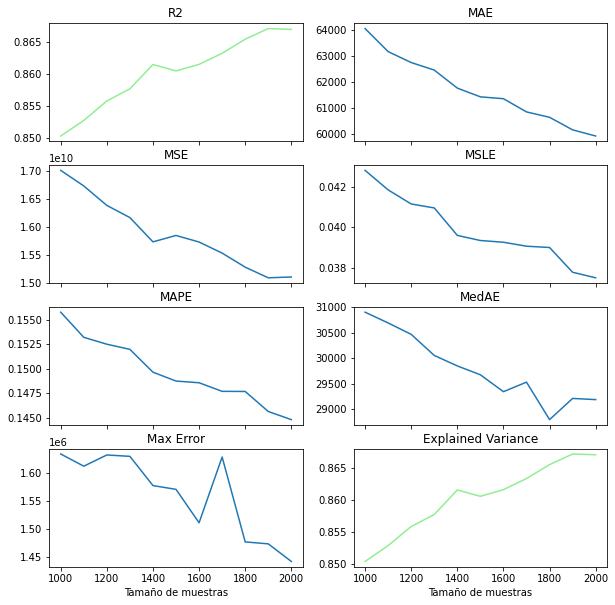

In [96]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(4, 2, sharex = True, figsize = (10, 10))

axis[0, 0].plot(valores_de_muestras, test_metrics_df['r2_score'],
                color = 'lightgreen')
axis[0, 0].set_title('R2')
axis[0, 1].plot(valores_de_muestras, test_metrics_df['mean_absolute_error'])
axis[0, 1].set_title('MAE')
axis[1, 0].plot(valores_de_muestras, test_metrics_df['mean_squared_error'])
axis[1, 0].set_title('MSE')
axis[1, 1].plot(valores_de_muestras, test_metrics_df['mean_squared_log_error'])
axis[1, 1].set_title('MSLE')
axis[2, 0].plot(valores_de_muestras, test_metrics_df['mean_absolute_percentage_error'])
axis[2, 0].set_title('MAPE')
axis[2, 1].plot(valores_de_muestras, test_metrics_df['median_absolute_error'])
axis[2, 1].set_title('MedAE')
axis[3, 0].plot(valores_de_muestras, test_metrics_df['max_error'])
axis[3, 0].set_title('Max Error')
axis[3, 0].set_xlabel('Tamaño de muestras')
axis[3, 1].plot(valores_de_muestras, test_metrics_df['explained_variance_score'],
                color = 'lightgreen')
axis[3, 1].set_title('Explained Variance')
axis[3, 1].set_xlabel('Tamaño de muestras')
plt.show()


Al graficar las distintas métricas contra las variaciones en este hiperparámetro, se observa cómo el valor de las métricas que miden la proporción de la varianza del target que el modelo puede predecir (p. ej. $R^2$ y explained variance; en color verde) aumentan, al aumentar también el tamaño de las muestras ('max_samples'). En contraste, como se esperaba, los valores de las métricas que consisten en funciones de pérdida, las cuales miden el error en los residuos (p. ej. MSE y MedAE; en color azul), disminuyen conforme el tamaño de las muestras se incrementa.

#Clasificación 

Todas las métricas de clasificación que serán expuestas en este trabajo son extraídas de la documentación oficial de la librería que hemos estado usando en el curso, scikit-learn.

Se pueden llegar a agrupar en 3 clases distintas 

* Clasificación binaria
* Clasificación multi clase
* Clasificacón multi etiqueta

Para poder demostrar todas las métricas nos dimos la tarea de encontrar datasets sencillos, que no nececitan de procesamiento, o por lo menos no demasiado para ilustar el uso de cada una

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import Template
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import det_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import hinge_loss
from sklearn import svm
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import label_ranking_loss
from sklearn.metrics import ndcg_score
from sklearn.metrics import dcg_score

## Clasificación binaria

Se cargan los datos

In [98]:
df=pd.read_csv("https://raw.githubusercontent.com/sebaszx/Tarea3Modulo2CienciasDatos/main/ion.csv")

In [99]:
df.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
V1,1,1,1,1,1
V2,0,0,0,0,0
V3,0.99539,1.0,1.0,1.0,1.0
V4,-0.05889,-0.18829,-0.03365,-0.45161,-0.02401
V5,0.85243,0.93035,1.0,1.0,0.9414
V6,0.02306,-0.36156,0.00485,1.0,0.06531
V7,0.83398,-0.10868,1.0,0.71216,0.92106
V8,-0.37708,-0.93597,-0.12062,-1.0,-0.23255
V9,1.0,1.0,0.88965,0.0,0.77152


Como se puede apreciar el nombre de las columnas o features no es muy descriptivo, sin embargo, podemos ver que la última columna class está clasificando de manera binaria.

In [100]:
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

In [101]:
df.dropna(axis=1, inplace=True)
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [102]:
y=df['Class']
df.drop(['Class'], axis=1,inplace=True)
X=df

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se va a utilizar el método Random Forest, sin embargo , cabe destacar que se escogió al azar debido a que en este trabajo nos centraremos en las métricas

In [104]:
Random_Forest= RandomForestClassifier()
Random_Forest.fit(X_train,y_train)
y_predict= Random_Forest.predict_proba(X_test)[:, 1]# Se utiliza predict_proba porque eso es lo que requiere para las curvas en sus paramentros
y_predict


array([0.18, 0.  , 0.  , 0.1 , 0.01, 0.02, 0.22, 0.03, 0.02, 0.02, 0.85,
       0.9 , 1.  , 0.56, 0.09, 0.14, 0.07, 0.84, 0.02, 0.8 , 0.02, 0.95,
       1.  , 0.05, 0.05, 0.73, 0.89, 0.95, 0.78, 0.05, 0.07, 0.01, 0.  ,
       0.23, 0.01, 0.89, 0.17, 0.1 , 0.95, 0.01, 0.02, 0.  , 0.23, 0.96,
       0.1 , 0.93, 0.85, 0.  , 0.8 , 0.01, 0.04, 0.57, 0.97, 0.56, 0.9 ,
       0.07, 0.  , 0.  , 0.01, 0.75, 0.81, 0.31, 0.67, 0.  , 0.01, 0.08,
       0.12, 0.01, 0.21, 0.16, 0.82])

### precision_recall_curve

La precisión es la relación $\frac{tp}{ (tp + fp)}$ donde **tp** es el número de verdaderos positivos y **fp** el número de falsos positivos. 

El recall o sensibilidad es la relación $ \frac{tp} { (tp + fn)}$ donde **tp** es el número de verdaderos positivos y **fn** el número de falsos negativos. 



precision:  [0.71794872 0.75       0.77142857 0.76470588 0.78787879 0.8125
 0.83870968 0.86666667 0.89655172 0.96296296 0.96153846 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]
recall :  [1.         0.96428571 0.96428571 0.92857143 0.92857143 0.92857143
 0.92857143 0.92857143 0.92857143 0.92857143 0.89285714 0.85714286
 0.82142857 0.78571429 0.75       0.71428571 0.67857143 0.60714286
 0.57142857 0.53571429 0.5        0.42857143 0.35714286 0.28571429
 0.25       0.14285714 0.10714286 0.07142857 0.        ]
Umbrales :  [0.1  0.12 0.14 0.16 0.17 0.18 0.21 0.22 0.23 0.31 0.56 0.57 0.67 0.73
 0.75 0.78 0.8  0.81 0.82 0.84 0.85 0.89 0.9  0.93 0.95 0.96 0.97 1.  ]


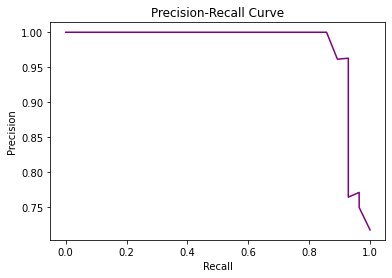

In [105]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
print("precision: ",precision)
print ("recall : ",recall)
print ("Umbrales : ",thresholds)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### roc_curve


La curva ROC (receiver operating characteristic) es parecida a la curva Precision-Recall, pero cambiando algunos valores. Relaciona el recall con el radio de falsos positivos. Es decir relaciona la sensibilidad de nuestro modelo con los fallos optimistas (clasificar los negativos como positivos). Tiene sentido ya que, generalmente, si aumentamos el recall, nuestro modelo tenderá a ser más optimista e introducirá mas falsos positivos en la clasificación.



True Positive Rate [0.         0.07142857 0.14285714 0.25       0.28571429 0.5
 0.60714286 0.67857143 0.85714286 0.89285714 0.92857143 0.92857143
 0.92857143 0.96428571 0.96428571 1.         1.         1.
 1.         1.         1.        ]
False Positive Rate [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02325581 0.02325581 0.06976744
 0.18604651 0.18604651 0.20930233 0.25581395 0.30232558 0.44186047
 0.48837209 0.62790698 1.        ]


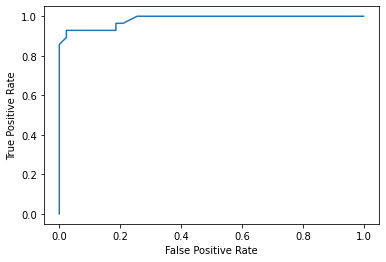

In [106]:
fpr, tpr,thresholds= roc_curve(y_test, y_predict)
print("True Positive Rate",tpr)
print("False Positive Rate",fpr)


plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Det_curve

es un gráfico de las tasas de error para los sistemas de clasificación binaria, que traza la tasa de rechazo falso frente a la tasa de aceptación falsa.

False negative rate  [0.         0.03571429 0.03571429 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.10714286 0.14285714]
False positive rate [0.25581395 0.20930233 0.18604651 0.18604651 0.1627907  0.13953488
 0.11627907 0.09302326 0.06976744 0.02325581 0.02325581 0.        ]


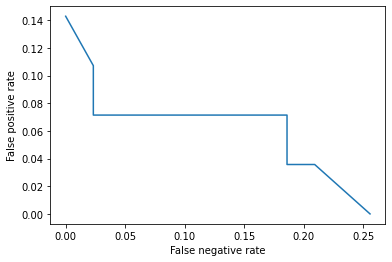

In [107]:
fpr, fnr,thresholds= det_curve(y_test, y_predict)
print("False negative rate ",fnr)
print("False positive rate",fpr)


plt.plot(fpr,fnr)
plt.ylabel('False positive rate')
plt.xlabel('False negative rate')
plt.show()

### f1_score
El f1 score se puede interpretar como una media armónica de precisión y recuperación, donde una puntuación F1 alcanza su mejor valor en 1 y su peor puntuación en 0. La contribución relativa de precisión y recuperación a la puntuación F1 es igual. La fórmula para la puntuación F1 es:

F1 = 2 * $\frac{(precision * recall) } {(precision + recall)}$

In [108]:
y_predict_= Random_Forest.predict(X_test)
Score=f1_score(y_test, y_predict_,average='binary')
print('F1 Score: ', Score)

F1 Score:  0.9259259259259259


### roc_auc_score
Calcular el área bajo la curva característica operativa del receptor (ROC AUC) a partir de las puntuaciones de predicción.


Tambien funciona para Multi clase y multi label

In [109]:
score= roc_auc_score(y_test, y_predict)
print('ROC AUC Score: ', Score)

ROC AUC Score:  0.9259259259259259


### balanced_accuracy_score
En problemas de clasificación binaria y multiclase para tratar con conjuntos de datos desequilibrados. Se define como el promedio de recuerdo obtenido en cada clase.

$balanced-accuracy = \frac{1}{2}\left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP}\right )$

In [110]:
#y_predict= Random_Forest.predict(X_test)
Score=balanced_accuracy_score(y_test,y_predict_)
print('balanced_accuracy_score: ', Score)

balanced_accuracy_score:  0.9348006644518272


###average_precision_score

Esta métrica calcula o resume una curva de precision-sensibilidad (precision-recall curve) como un promedio de las precisiones alcanzadas en cada umbral. Con el aumento en la sensibilidad desde el umbral anterior utilizado como peso

$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$

Donde $R_n$  es el recall y $P_n$ la precision


In [111]:
#y_predict= Random_Forest.predict(X_test)

Score=average_precision_score(y_test,y_predict_)
print('average_precision_score: ', Score)

average_precision_score:  0.9007700046432441


## Clasificación multi clase


Se carga el dataset


In [112]:
df=pd.read_csv('https://raw.githubusercontent.com/sebaszx/Tarea2Modulo2CienciasDatos-/main/fetal_health.csv')

In [113]:
df.shape

(2126, 22)

In [114]:
df.isna()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [115]:

df.fetal_health.unique()

array([2., 1., 3.])

Se separan los features de las etiquetas. Como podemos observar en la celda anterior esta vez tenemos 3 clases.

In [116]:
X = df.drop(['fetal_health'],axis=1)
y = df['fetal_health']


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [118]:
Random_Forest= RandomForestClassifier()
Random_Forest.fit(X_train,y_train)
y_predict_multiclass= Random_Forest.predict(X_test)
y_predict

array([0.18, 0.  , 0.  , 0.1 , 0.01, 0.02, 0.22, 0.03, 0.02, 0.02, 0.85,
       0.9 , 1.  , 0.56, 0.09, 0.14, 0.07, 0.84, 0.02, 0.8 , 0.02, 0.95,
       1.  , 0.05, 0.05, 0.73, 0.89, 0.95, 0.78, 0.05, 0.07, 0.01, 0.  ,
       0.23, 0.01, 0.89, 0.17, 0.1 , 0.95, 0.01, 0.02, 0.  , 0.23, 0.96,
       0.1 , 0.93, 0.85, 0.  , 0.8 , 0.01, 0.04, 0.57, 0.97, 0.56, 0.9 ,
       0.07, 0.  , 0.  , 0.01, 0.75, 0.81, 0.31, 0.67, 0.  , 0.01, 0.08,
       0.12, 0.01, 0.21, 0.16, 0.82])

###roc_auc_score multi class

In [119]:
score=roc_auc_score(y_test, Random_Forest.predict_proba(X_test), multi_class='ovr')
print('roc auc score: ',score)

roc auc score:  0.9938298985240407


### f1_score multi class

In [120]:
y_predict= Random_Forest.predict(X_test)
Score=f1_score(y_test, y_predict,average='weighted')
print('F1 Score: ', Score)

F1 Score:  0.9615747626580703


### balanced_accuracy_score



In [121]:
#y_predict= Random_Forest.predict(X_test)
Score=balanced_accuracy_score(y_test, y_predict)
print('balanced_accuracy_score: ', Score)

balanced_accuracy_score:  0.9244282035406965


### cohen_kappa_score
Si hay N elementos que deben clasificarse en C categorías mutuamente excluyentes, el trabajo de kappa de Cohen es medir el acuerdo entre los dos evaluadores para clasificar N en C. Para calcular el coeficiente Kappa tomaremos la probabilidad de acuerdo menos la probabilidad de desacuerdo dividida por 1 menos la probabilidad de desacuerdo.

In [122]:

Score=cohen_kappa_score(y_test, y_predict)
print('cohen_kappa_score: ', Score)

cohen_kappa_score:  0.8907692307692308


###confusion_matrix

Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real

confusion_matrix:  [[332   3   1]
 [ 10  50   1]
 [  0   1  28]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


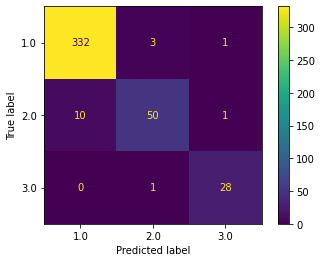

In [123]:

Score=confusion_matrix(y_test, y_predict)
print('confusion_matrix: ', Score)
plot_confusion_matrix(Random_Forest, X_test, y_test) 

### Hinge_loss

Hinge Loss es un tipo específico de función de costo que incorpora un margen o distancia desde el límite de clasificación en el cálculo del costo. Incluso si las nuevas observaciones se clasifican correctamente, pueden incurrir en una penalización si el margen del límite de decisión no es lo suficientemente grande. La pérdida de bisagra aumenta linealmente.

In [124]:
#Ejemplo tomado de SkLearn
X1 = np.array([[0], [1], [2], [3]])
Y1 = np.array([0, 1, 2, 3])
labels = np.array([0, 1, 2, 3])
est = svm.LinearSVC()
est.fit(X1, Y1)
pred_decision = est.decision_function([[-1], [2], [3]])
y_true = [0, 2, 3]
hinge_loss(y_true, pred_decision, labels=labels)

0.5641115242969065

### matthews_corrcoef

La métrica de matthews_corrcoef es muy utilizada cuando nuestro set de datos se encuentra desbalanceado.

El valor de MCC oscila entre -1 y 1, donde:
* -1 indica que las predicciones fueron muy erroneas
* 0 es sinónimo de predicciones completamente aleatorias
* 1 indica que las predicciones fueron muy exactas

MCC =$ \frac{
    c \times s - \sum_{k}^{K} p_k \times t_k
}{\sqrt{
    (s^2 - \sum_{k}^{K} p_k^2) \times
    (s^2 - \sum_{k}^{K} t_k^2)
}}$

In [125]:
Score=matthews_corrcoef(y_test, y_predict)
print('matthews_corrcoef: ', Score)

matthews_corrcoef:  0.8916998840557864


###top_k_accuracy_score

Esta métrica calcula la cantidad de veces que la etiqueta correcta se encuentra entre las k primeras etiquetas predichas 

$\texttt{top-k accuracy}(y, \hat{f}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} \sum_{j=1}^{k} 1(\hat{f}_{i,j} = y_i)$

Donde  

$\hat{f}_{i,j} $ es la clase predicha para la -ésima muestra correspondiente a la -ésima puntuación pronosticada más grande y $y_i$
 es el valor verdadero correspondiente

In [126]:
Score=top_k_accuracy_score(y_test, Random_Forest.predict_proba(X_test), k=2, normalize=True)
print('top_k_accuracy_score: ', Score)

top_k_accuracy_score:  0.9976525821596244


###accuracy_score
Esta métrica describe cuantas predicciones fueron iguales al conjunto de labels para probar el modelo 
$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$

In [127]:
Score=accuracy_score(y_test, y_predict)
print('accuracy_score: ', Score)

accuracy_score:  0.9624413145539906


###classification_report


In [128]:
target_names = ['class 0', 'class 1', 'class 2']
report=classification_report(y_test, y_predict,target_names=target_names)

print('classification_report: ')
print(report)

classification_report: 
              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98       336
     class 1       0.93      0.82      0.87        61
     class 2       0.93      0.97      0.95        29

    accuracy                           0.96       426
   macro avg       0.94      0.92      0.93       426
weighted avg       0.96      0.96      0.96       426



###Hamming Loss

Esta métrica lo que nos ayuda a calcular es la perdida o distancia entre dos conjuntos de datos. Entonces esta métrica cuenta las veces que la predicción es equivocada con respecto a las etiquetas reales.

$L_{Hamming}(y, \hat{y}) = \frac{1}{n_\text{labels}} \sum_{j=0}^{n_\text{labels} - 1} 1(\hat{y}_j \not= y_j)$


In [129]:
averages=['micro','macro','weighted']

###fbeta_score

Sigue siendo el mismo f1 score que vimos en la sección pasada, pero esta vez tenemos un hiper parámetro llamado beta. El parámetro beta determina el peso de la sensibilidad en el score combinado. beta < 1 da más peso a la precisión, mientras que beta > 1 favorece la recuperación (beta -> 0 considera solo precisión, beta -> +inf solo sensibilidad).





In [130]:
txt = "fbeta_score with {}:"

for i in averages:
  Score=fbeta_score(y_test, y_predict,average=i,beta=0.5)
  print(txt.format(i),Score)

fbeta_score with micro: 0.9624413145539906
fbeta_score with macro: 0.938767598334795
fbeta_score with weighted: 0.9615643601741118


###precision_recall_fscore_support
Para esta métrica tenemos que recordar los conceptos de precisión, sensibilidad (recall) y f beta score que ya vimos. Lo que se aprecia como support o soporte es el número de ocurrencias de cada clase en las etiquetas reales

In [131]:
txt = "precision_recall_fscore_support with {}:"
av=averages.append(None)
for i in averages:
  Score=precision_recall_fscore_support(y_test, y_predict,average=i,beta=0.5)
  print(txt.format(i),Score)
averages.pop()

precision_recall_fscore_support with micro: (0.9624413145539906, 0.9624413145539906, 0.9624413145539906, None)
precision_recall_fscore_support with macro: (0.9433398310591293, 0.9244282035406965, 0.938767598334795, None)
precision_recall_fscore_support with weighted: (0.9617924571470408, 0.9624413145539906, 0.9615643601741118, None)
precision_recall_fscore_support with None: (array([0.97076023, 0.92592593, 0.93333333]), array([0.98809524, 0.81967213, 0.96551724]), array([0.9741784 , 0.90252708, 0.93959732]), array([336,  61,  29]))


###precision_score
Recordamos la definición anterior. La precisión se puede ver como la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa.

In [132]:
txt = "precision_score with {}:"

for i in averages:
  Score=precision_score(y_test, y_predict,average=i)
  print(txt.format(i),Score)

precision_score with micro: 0.9624413145539906
precision_score with macro: 0.9433398310591293
precision_score with weighted: 0.9617924571470408


###recall_score

Recordamos la definición anterior. La sensibilidad se puede ver como la capacidad del clasificador para encontrar todas las muestras positivas.

In [133]:
txt = "recall_score with {}:"

for i in averages:
  Score=recall_score(y_test, y_predict,average=i)
  print(txt.format(i),Score)

recall_score with micro: 0.9624413145539906
recall_score with macro: 0.9244282035406965
recall_score with weighted: 0.9624413145539906


##Clasificación multi etiqueta

Para estas métricas el dataset que vamos usar nos lo dá Scikit-Learn en el modulo de datasets. El método a usar es make_multilabel_classification, este nos permite crear un dataset multilabel con las especificaciones que necesitamos.


In [134]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier

X, y = make_multilabel_classification(n_samples=150, n_classes=3, random_state=0,n_features=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

Random_Forest = RandomForestClassifier()

chain = ClassifierChain(Random_Forest, order='random', random_state=0)
chain.fit(X_train, y_train)

y_predict_proba=chain.predict_proba(X_test)# las probabilidades
y_predict=chain.predict(X_test)

In [135]:
X

array([[ 2., 10.,  6., ...,  3.,  1.,  3.],
       [ 3.,  1.,  4., ...,  4.,  3.,  3.],
       [ 9.,  6.,  6., ...,  1.,  4.,  4.],
       ...,
       [ 2., 10.,  6., ...,  5.,  3.,  0.],
       [ 5.,  3.,  7., ...,  2.,  3.,  4.],
       [ 3.,  7.,  5., ...,  4.,  3.,  2.]])

In [136]:
y[0:4]

array([[1, 1, 0],
       [1, 0, 1],
       [1, 1, 1],
       [0, 1, 1]])

In [137]:
#Se importan las métricas de multilabel ranking
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import label_ranking_loss
from sklearn.metrics import dcg_score
from sklearn.metrics import ndcg_score

###Coverage error

Calcula el número promedio de etiquetas que deben ser incluidas en la predición final para que todas las etiquetas verdaderas sean predichas. Indica cuántas etiquetas de alto puntaje se deben predecir en promedio para no dejar ninguna verdadera por fuera.

Su mejor valor es entonces el promedio de etiquetas verdaderas.

$coverage(y, \hat{f}) = \frac{1}{n_{\text{samples}}}
  \sum_{i=0}^{n_{\text{samples}} - 1} \max_{j:y_{ij} = 1} \text{rank}_{ij}$



In [138]:
Score=coverage_error(y_test, y_predict)
print('coverage_error: ', Score)

coverage_error:  1.9473684210526316


###Label ranking average precision score

La LRAP indica qué proporción de las etiquetas de alto puntaje son verdaderas para cada etiqueta observada (verdadera).

El mejor valor es 1; siempre es mayor a 0.

$LRAP(y, \hat{f}) = \frac{1}{n_{\text{samples}}}
  \sum_{i=0}^{n_{\text{samples}} - 1} \frac{1}{||y_i||_0}
  \sum_{j:y_{ij} = 1} \frac{|\mathcal{L}_{ij}|}{\text{rank}_{ij}}$



In [139]:
Score=label_ranking_average_precision_score(y_test, y_predict)
print('label_ranking_average_precision_score: ', Score)

label_ranking_average_precision_score:  0.8925438596491228


###Ranking loss

Calcula la pérdida de ranking, la cual promedia sobre las muestras el número de pares de etiquetas que son ordenadas incorrectamente, dándole peso (inversamente) al número de pares ordenados de etiquetas falsas y verdaderas.

El mejor valor para esta métrica es 0.

$ranking\_loss(y, \hat{f}) =  \frac{1}{n_{\text{samples}}}
  \sum_{i=0}^{n_{\text{samples}} - 1} \frac{1}{||y_i||_0(n_\text{labels} - ||y_i||_0)}
  \left|\left\{(k, l): \hat{f}_{ik} \leq \hat{f}_{il}, y_{ik} = 1, y_{il} = 0 \right\}\right|$

In [140]:
Score=label_ranking_loss(y_test, y_predict)
print('label_ranking_loss: ', Score)

label_ranking_loss:  0.23684210526315788


###Discounted Cumulative Gain (DCG)

Esta métrica es una medida de la calidad del ranking. Compara el un orden predicho con puntajes observados (verdaderos) como referencia. Puede medir, por ejemplo, la relevancia de respuestas ante una búsqueda (en motores de búsqueda).

DCG ordena los targets verdaderos en el orden predicho y puede truncarse después de un número determinado de resultados ($K$).

Su valor usualmente oscila entre 0 y 1.

$\sum_{r=1}^{\min(K, M)}\frac{y_{f(r)}}{\log(1 + r)}$

In [141]:
Score=dcg_score(y_test, y_predict)
print('dcg_score: ', Score)

dcg_score:  1.2735360491071588


### Discounted Cumulative Gain (NDCG)

Esta otra métrica que mide la calidad del ranking y está muy relacionada a DCG.
Al compararla con Ranking loss, NDCG puede usarse cuando se cuenta, además del orden, con puntajes de relevancia.

Esta métrica (NDCG) suele ser preferida sobre DCG.

NDCG se calcula dividiendo el valor de DCG score entre el DCG score obtenido para $y$.

In [142]:
Score=ndcg_score(y_test, y_predict)
print('ndcg_score: ', Score)

ndcg_score:  0.8286261771509991
